# Clustering Assignment

#### Understanding the problem statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programs, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 


#### Business Goal

As a data analyst the countries have to be categorised using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most. 

# Clustering of Countries 
Following workflow have been deployed in this assignment

1.	Data Understanding
2.	Exploratory Data Analysis
3.	Data Preparation for Clustering
4.	Perform KMeans Clustering
5.	Perform Heirarchical Clustering
6.	Final Countries Identification

In [1]:
# Importing all the necessary libraries used in this file

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing numpy and Pandas
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# To perform Hopkins Score Calculation
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# To perform StandardScaler Scaling
from sklearn.preprocessing import StandardScaler

# Silhouette Score Calculation
from sklearn.metrics import silhouette_score

# Data Understanding

Reading and inspecting the basic Countries Dataframe

In [2]:
# Reading the dataset from csv file

co = pd.read_csv('Country-data.csv')
co.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Converting imports,exports and health spending from  percentage values to actual values of their GDP per capita
because the percentage values don't give a clear picture of that country. 
For ex. afghanistan and albania have similar imports percentange but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

### Converting %GDP columns to original value for clustering 

In [3]:
#Converting exports,imports and health spending percentages to absolute values.

co['exports'] = co['exports']*co['gdpp']/100
co['imports'] = co['imports']*co['gdpp']/100
co['health'] = co['health']*co['gdpp']/100

In [4]:
# Checking top rows after % to value calculation
co.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [5]:
#Checking shape of the dataframe

co.shape

(167, 10)

In [6]:
# Basic information check
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Exploratory Data Analysis

### Dropping Duplicates & Rows with all missing values (if any)

In [7]:
# Drop rows and columns from the dataframe which are entirely having missing values, if any
co = co.dropna(axis =1, how='all')

# Checking for duplicates and dropping the entire duplicate row if any
co.drop_duplicates(subset=None, inplace=True)

<b>Analysis:</b> There are no duplicate or missing rows in the dataset provided

In [8]:
# Inspecting if there is any change in shape

co.shape

(167, 10)

### Missing Value Check

In [9]:
# Dataframe missing value checks

round(100*(co.isnull().sum())/len(co),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [10]:
# Considering all the numerical variables as a list for future references

co_num=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

## Univariate Analysis

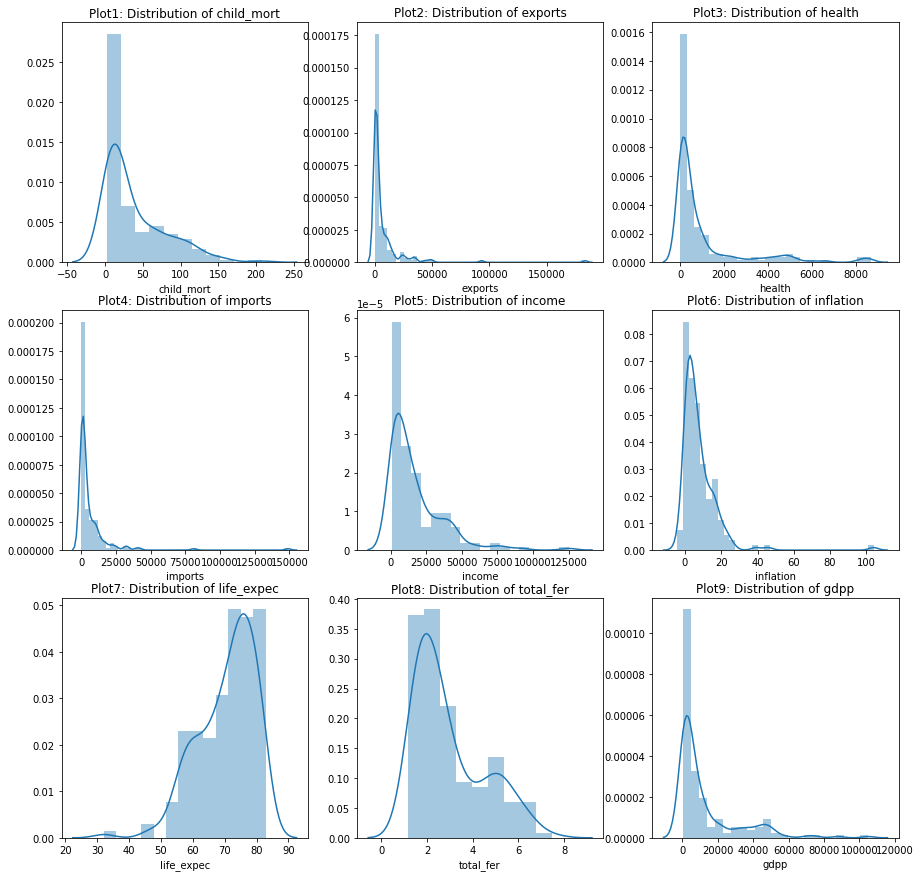

In [11]:
# Plotting the distribution of each numerical value for the given dataset
plt.figure(figsize=(15,15))

for i in enumerate(co_num): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(co[i[1]])
    plt.title("Plot"+str(i[0]+1)+": Distribution of "+str(co_num[i[0]]))
    plt.xticks(rotation = 0)
plt.show()

<b>Analysis: </b> The plots show the distribution of all the columns of the dataset. It is clearly evident that all the columns are heavily skewed. These plots show gdpp, child_mort, health, imports, exports, income, inflation are all Right skewed and otherwise approximately have high density of values centering around one point. Only Life Expectancy and Total Fertility have values distributed over several data points

## Bivariate Analysis

<Figure size 864x576 with 0 Axes>

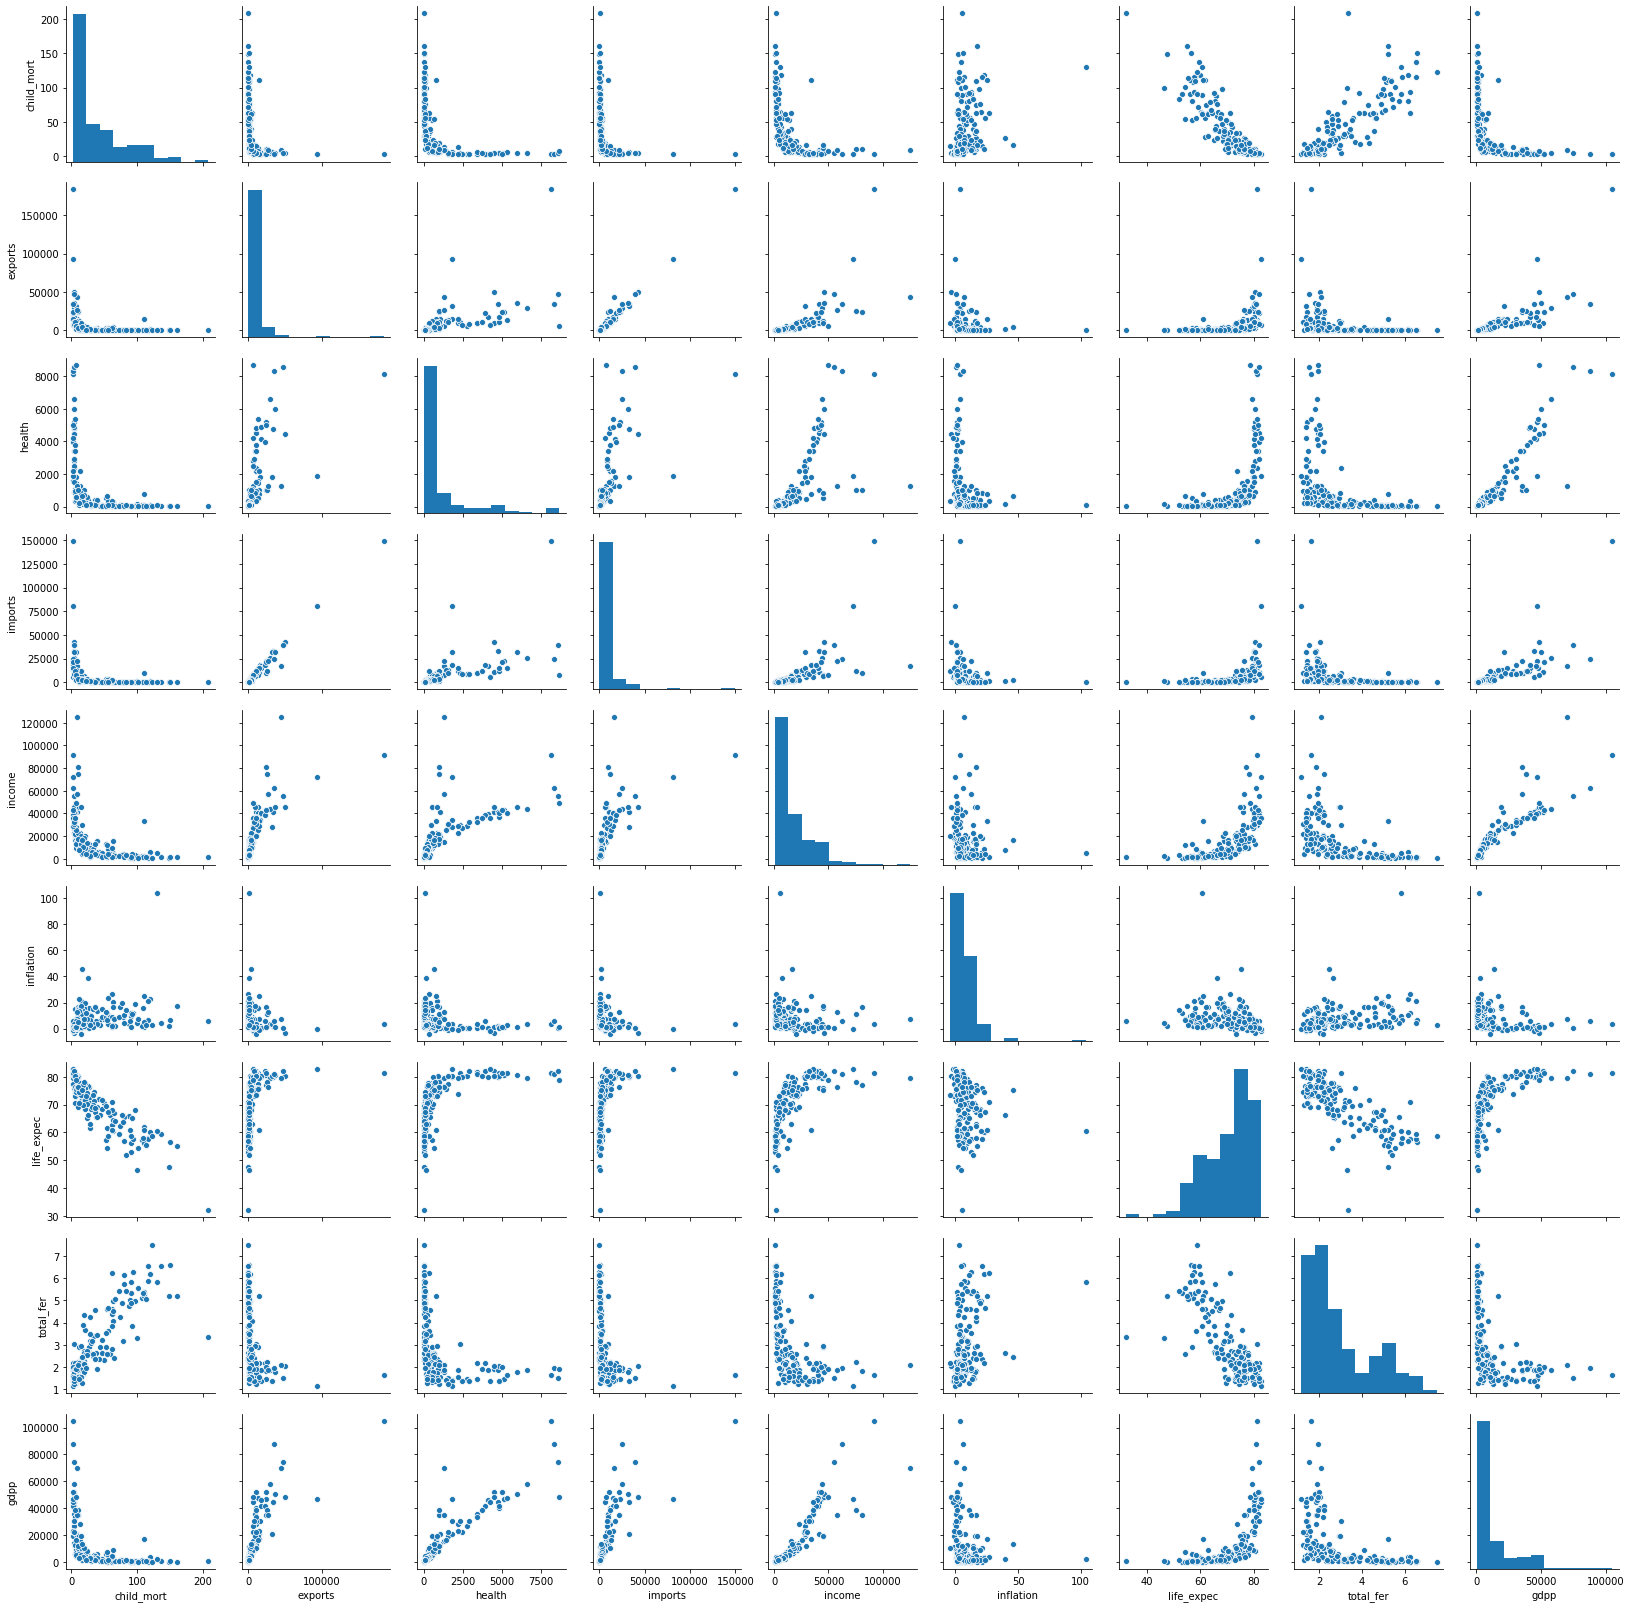

In [12]:
# Pairwise scatter plot of numeric variables from the dataset

plt.figure(figsize=(12, 8))
sns.pairplot(co[co_num])
plt.show()

<b>Analysis: </b> From the plot above we find the most linearly correlated parameters are:
 - Import & Exports
 - Health & GDP
 - Total_fertility & Child Mortality
 - Imports & GDP
 - Exports & GDP
 
 These correlations will not impact Clusering

## Multivariate Analysis

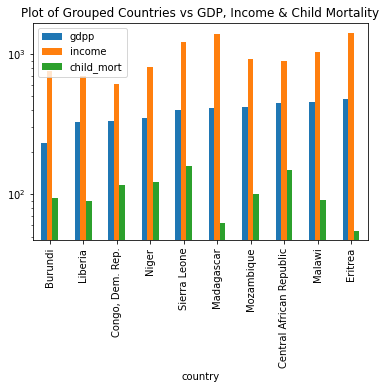

In [13]:
# Grouping by country and then sorti g as per low gdp, low income and high mortality

co.groupby('country')['gdpp','income','child_mort'].mean().sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False])[0:10].plot(kind = 'bar')
plt.yscale('log')
plt.title("Plot of Grouped Countries vs GDP, Income & Child Mortality")
plt.show()

<b>Analysis: </b> From the plots above we can infer that when we group by countries and sort them as per low GDP, low Income and high child mortality rate the then 10 countries we get are as follows common in all these lists:

1. Burundi 
2. Liberia
3. Congo,Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

## Correlation Analysis

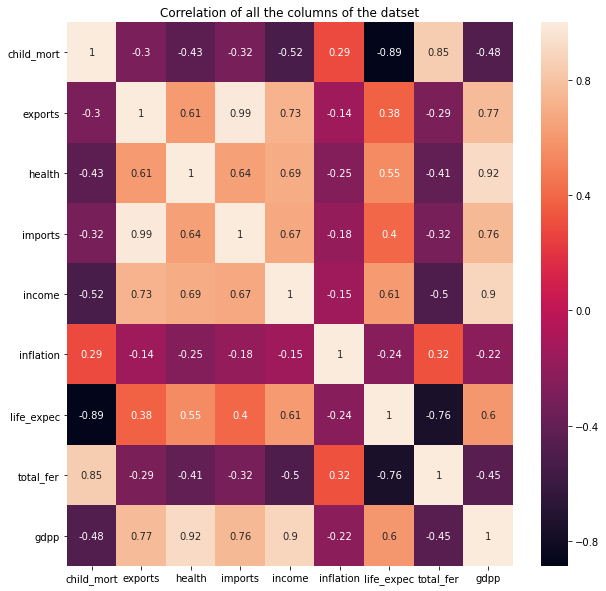

In [14]:
# Correlation Mapping

plt.figure(figsize = (10,10))        
sns.heatmap(co.corr(),annot = True)
plt.title("Correlation of all the columns of the datset")
plt.yticks(rotation = 0)
plt.show()

In [15]:
# Checking the correlation of parameters for dataframe with people who have defaulted in payments 

co_1 = co.corr()
corrdf = co_1.where(np.triu(np.ones(co_1.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns = ['Column1','Column2','Correlation']
corrdf.dropna(subset=['Correlation'],inplace=True)
print("Top Positive Correlated Columns are mentioned below:\n\n", round(corrdf.sort_values('Correlation',ascending=False),2).head(10))
print("\nTop Negative Correlated Columns are mentioned below:\n\n", round(corrdf.sort_values('Correlation',ascending=True),2).head(10))

Top Positive Correlated Columns are mentioned below:

       Column1     Column2  Correlation
28    imports     exports         0.99
74       gdpp      health         0.92
76       gdpp      income         0.90
63  total_fer  child_mort         0.85
73       gdpp     exports         0.77
75       gdpp     imports         0.76
37     income     exports         0.73
38     income      health         0.69
39     income     imports         0.67
29    imports      health         0.64

Top Negative Correlated Columns are mentioned below:

        Column1     Column2  Correlation
54  life_expec  child_mort        -0.89
69   total_fer  life_expec        -0.76
36      income  child_mort        -0.52
67   total_fer      income        -0.50
72        gdpp  child_mort        -0.48
79        gdpp   total_fer        -0.45
18      health  child_mort        -0.43
65   total_fer      health        -0.41
27     imports  child_mort        -0.32
66   total_fer     imports        -0.32


<b>Analysis: </b> The above tables show the highest positively and negatively correlated values.These correlations will not impact Clusering.

# Clustering

## Data Preparation for Clustering

### Outlier Treatment

For outlier handling we have deployed the Capping at 99% Method but since the no of columns is less so that we dont loose out on essential data

In [16]:
# function to remove the outliers using Capping at 99% method.

def outliers_treat(data, col):
    Q4 = data[col].quantile(0.99)
    data[col][data[col] >= Q4]=Q4
    return data

In [17]:
# Statistical Summary before applying IQR function

co.describe(percentiles = [0,0.25,0.5,0.75,0.95,0.99,1])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


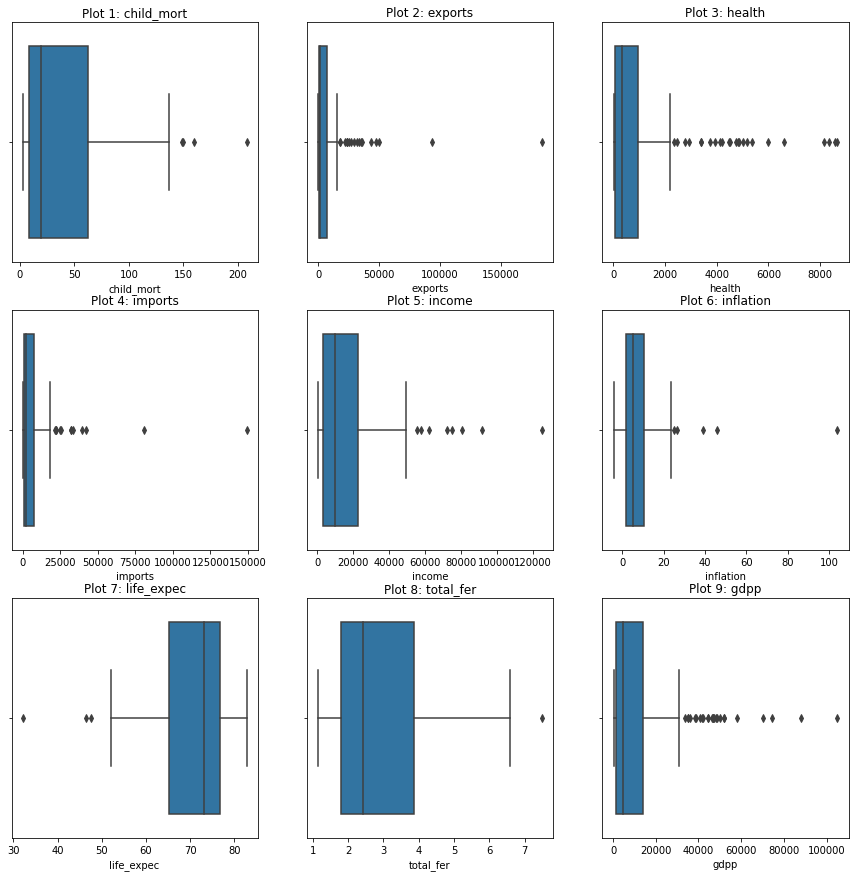

In [18]:
# Checking for outliers in all the numerical columns

plt.figure(figsize=(15,15))
for i in enumerate(co_num):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(co[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.show()

<b>Analysis: </b> We can see that all the columns have outliers but except for life expectancy and total Fer there are lot of outliers in other columns which might be significant for calculation of countries requiring financial aid and hence we will only cap at 99% as outlier.

In [19]:
# Removing Statistical Outlier

for i in co_num:
    co = outliers_treat(co,i)


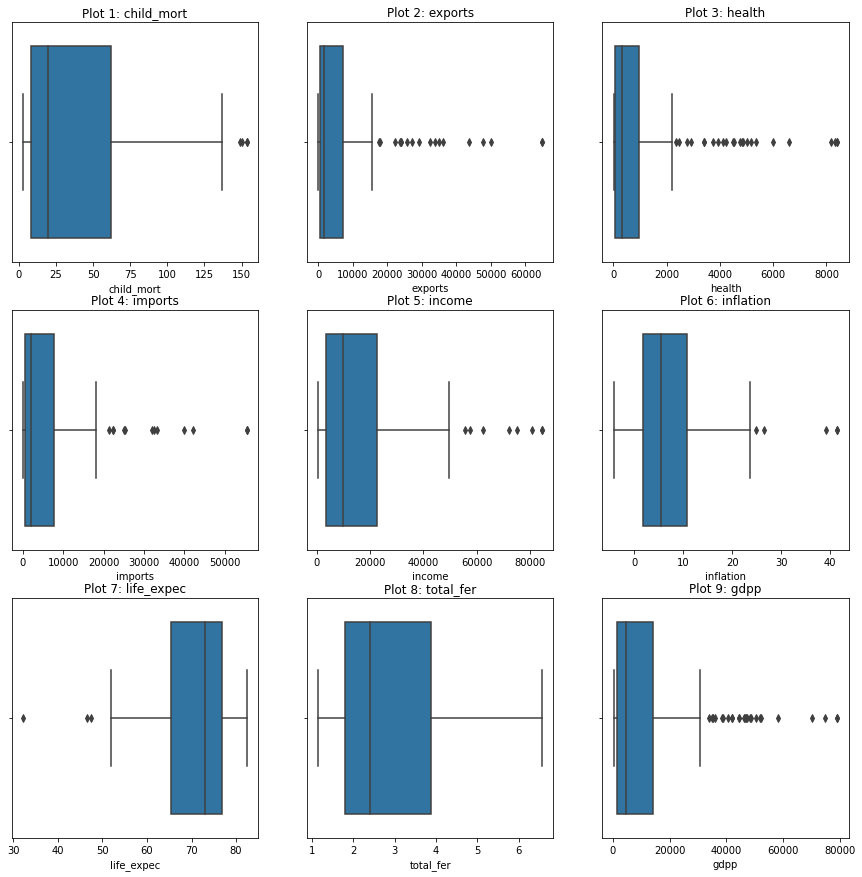

In [20]:
# Plotting the variables after removing outliers
plt.figure(figsize=(15,15))
for i in enumerate(co_num):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(co[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.show()

In [21]:
# Inspecting shape of Dataframe after Outlier Treatment
co.shape

(167, 10)

In [22]:
#Hopkins Score Calculation Function
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
# This checks clustering feasibility of the dataframe

hopkins(co[co_num])

0.9016623893785766

In [24]:
# Instantiating StandardScaler

scaler = StandardScaler()

Standardization prevents variables with larger scales from dominating how clusters are defined. It allows all variables to be considered by the algorithm with equal importance.Hence dataframe is standardized using standard scaler. Standardization is used here before clustering as:
- Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale helps in this process. 
- The different attributes will have the measures in different units. Thus, standardisation helps in making the attributes unit-free and uniform. 


In [25]:
# Fitting the scaled value creating a new dataframe
co_scaled = scaler.fit_transform(co[co_num])
co_scaled.shape

(167, 9)

In [26]:
#First convert the numpy array that you have to a dataframe
co_scaled = pd.DataFrame(co_scaled)
co_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
co_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


# Modelling

## Finding the Optimal Number of Clusters

We will be using 2 methods to select the optimal no of clusters - Silhouette Score & Elbow Curve Method

### Silhouette Analysis


For n_clusters=2, the silhouette score is 0.4689794995934819
For n_clusters=3, the silhouette score is 0.4051014147893431
For n_clusters=4, the silhouette score is 0.3933580180248251
For n_clusters=5, the silhouette score is 0.38438255041795266
For n_clusters=6, the silhouette score is 0.2791038001125298
For n_clusters=7, the silhouette score is 0.2890779322324245
For n_clusters=8, the silhouette score is 0.31736538048891777


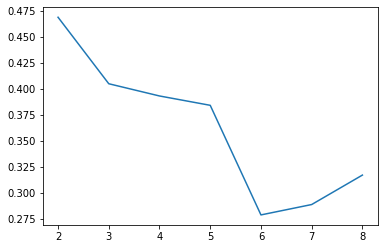

In [27]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
ss=[]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(co_scaled)
    ss.append([num_clusters, silhouette_score(co_scaled, kmeans.labels_)])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(co_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

<b>Analysis: </b>3 clusters seems an optimal number as silhouette sscore is not too high and not too low i.e. a good value for consideration.But still there is similarity between 3,4,5 so we will analyze kmeans for all these 3 cluster values

### Elbow Curve

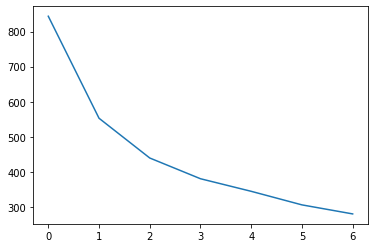

In [28]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter = 50)
    kmeans.fit(co_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

<b>Analysis: </b> Analysing the curve in the plot cluster 3 looks an optimum value as it looks like the end of a little extended elbow and 2 clusters will be too less to consider for clustering. 
But still there is similarity between 3,4,5 so we will analyze kmeans for all these 3 cluster values

## Kmeans algorithm selecting cluster = 3

In [29]:
# Model with k=3
kmeans1 = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans1.fit(co_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [30]:
kmeans1.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [31]:
# Creating a new dataframe for cluster profiling and analysis of clusters

co_kmean1 = co.copy()

In [32]:
# Assigning the cluster labels as cluster_id to the dataframe

co_kmean1["cluster_id"] = kmeans1.labels_
co_kmean1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [33]:
co_kmean1["cluster_id"].value_counts()

2    90
0    48
1    29
Name: cluster_id, dtype: int64

### Visualization of the clusters

We will analyse the clusters by comparing how these three variables - <b>gdpp, child_mort and income</b> vary for each cluster of countries

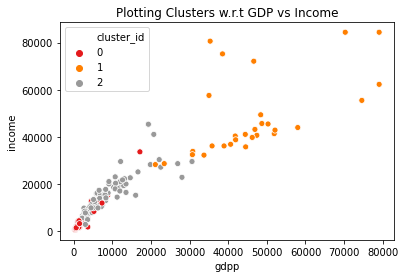

In [34]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = co_kmean1, palette='Set1')
plt.title("Plotting Clusters w.r.t GDP vs Income")
plt.show()

<b>Analysis: </b>The plot represents the 3 clusters, although there is little convergence in cluster 0 and cluster 2 countries, it is evident that Cluster 0 countries are underdeveloped as they show low income & GDP of the country

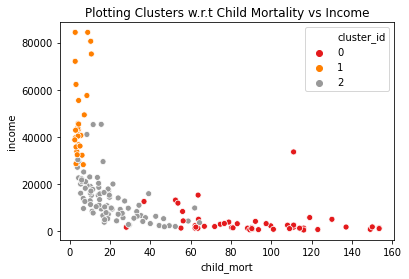

In [35]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = co_kmean1, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs Income")
plt.show()

<b>Analysis: </b>The plot clearly represents the 3 clusters, and it is evident that Cluster 0 countries are. underdeveloped as they show growth in Child Mortality with increase in Income of the country.

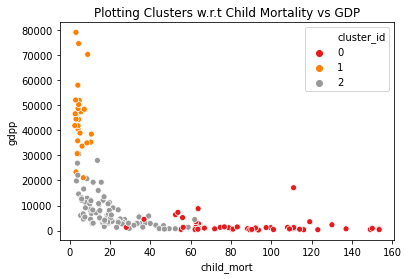

In [36]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = co_kmean1, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs GDP")
plt.show()

<b>Analysis: </b>The plot clearly represents the 3 clusters, and it is evident that Cluster 0 countries are underdeveloped as they show growth in Child Mortality with increase in GDP of the country

## Kmeans with cluster =4

In [37]:
# Model with k=4
kmeans2 = KMeans(n_clusters=4, max_iter=50,random_state=100)
kmeans2.fit(co_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [38]:
kmeans2.labels_

array([0, 2, 2, 0, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 3, 2, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 3, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 3, 2, 2, 0, 0, 2,
       0, 2, 3, 2, 2, 2, 0, 1, 3, 3, 2, 3, 2, 2, 0, 0, 3, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 3, 0, 0, 1, 3, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 3, 3, 0, 0, 3, 3, 2, 2, 0, 2, 3, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [39]:
# Creating a new dataframe for cluster profiling and analysis of clusters

co_kmean2 = co.copy()

In [40]:
# Assigning the cluster labels as cluster_id to the dataframe

co_kmean2["cluster_id"] = kmeans2.labels_
co_kmean2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [41]:
# Check the count of observation per cluster

co_kmean2['cluster_id'].value_counts()

2    81
0    48
3    29
1     9
Name: cluster_id, dtype: int64

### Visualization of the clusters

We will analyse the clusters by comparing how these three variables - <b>gdpp, child_mort and income</b> vary for each cluster of countries

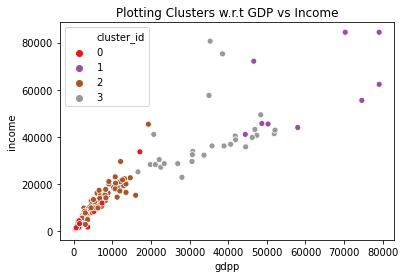

In [42]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = co_kmean2, palette='Set1')
plt.title("Plotting Clusters w.r.t GDP vs Income")
plt.show()

<b>Analysis: </b>The plot represents overlap in cluster 0 and cluster 2 countries, it is evident with little confidence that Cluster 0 countries are underdeveloped as they show low income & GDP of the country 

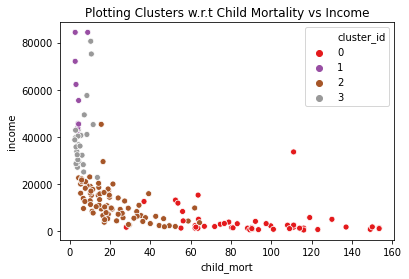

In [43]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = co_kmean2, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs Income")
plt.show()

<b>Analysis: </b>The plot clearly represents the 4 clusters, and it is evident that Cluster 0 countries are. underdeveloped as they show growth in Child Mortality with increase in Income of the country.

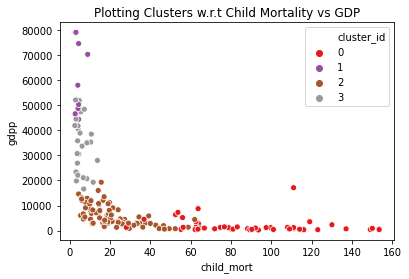

In [44]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = co_kmean2, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs GDP")
plt.show()

<b>Analysis: </b>The plot clearly represents the 4 clusters, and it is evident that Cluster 0 countries are underdeveloped as they show growth in Child Mortality with increase in GDP of the country. There is overlap in cluster 2 and 3

## Kmeans with cluster = 5

In [45]:
# final model with k=5
kmeans3 = KMeans(n_clusters=5, max_iter=50,random_state=100)
kmeans3.fit(co_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [46]:
kmeans3.labels_

array([3, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 4, 2, 3, 2, 2, 2, 3,
       2, 0, 2, 3, 3, 2, 3, 0, 2, 3, 3, 2, 2, 2, 3, 1, 1, 2, 3, 2, 0, 0,
       4, 2, 2, 2, 2, 1, 3, 2, 2, 0, 0, 1, 3, 2, 0, 1, 0, 2, 2, 3, 3, 2,
       3, 2, 0, 2, 2, 2, 1, 4, 0, 0, 2, 0, 2, 2, 3, 3, 0, 2, 3, 2, 2, 3,
       3, 2, 2, 4, 2, 3, 3, 2, 2, 3, 0, 1, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2,
       4, 0, 3, 1, 4, 2, 3, 2, 2, 2, 2, 2, 0, 4, 2, 2, 3, 2, 2, 3, 2, 2,
       3, 4, 0, 0, 3, 3, 0, 0, 2, 2, 1, 2, 0, 4, 2, 3, 2, 1, 3, 2, 2, 2,
       2, 3, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 3], dtype=int32)

In [47]:
# Creating a new dataframe for cluster profiling and analysis of clusters

co_kmean3 = co.copy()

In [48]:
# Assigning the cluster labels as cluster_id to the dataframe

co_kmean3["cluster_id"] = kmeans3.labels_
co_kmean3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [49]:
# Check the count of observation per cluster

co_kmean3['cluster_id'].value_counts()

2    80
3    36
0    28
1    14
4     9
Name: cluster_id, dtype: int64

### Visualization of the clusters

We will analyse the clusters by comparing how these three variables - <b>gdpp, child_mort and income</b> vary for each cluster of countries

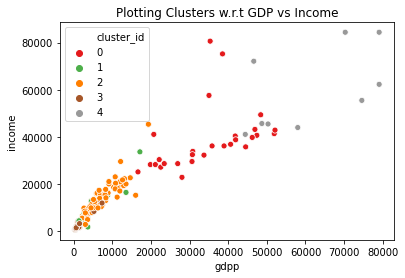

In [50]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = co_kmean3, palette='Set1')
plt.title("Plotting Clusters w.r.t GDP vs Income")
plt.show()

<b>Analysis: </b>The plot represents the 5 clusters, there is lot of overlap between cluster 0,1,3. It cannot be clearly determined which cluster has underdeveloped countries as they all show low income & GDP of the country

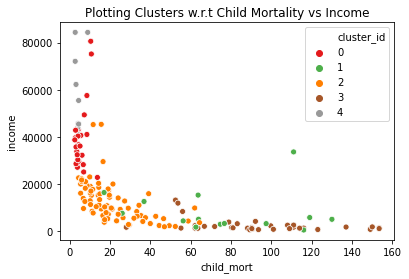

In [51]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = co_kmean3, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs Income")
plt.show()

<b>Analysis: </b>The plot clearly represents the 5 clusters, there is overlap between Cluster 1 and 3. So it is not clear regarding underdeveloped countries as they both show growth in Child Mortality with increase in Income of the country.

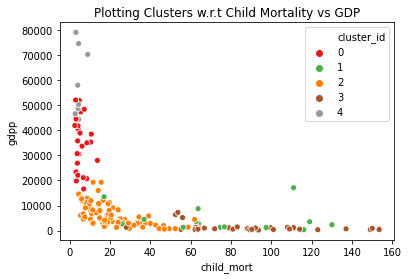

In [52]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = co_kmean3, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs GDP")
plt.show()

<b>Analysis: </b>The plot shows 5 clusters, with cluster 1 & 3 overlapping as well as 0 & 4 overlapping, its not easy to determine the underdeveloped countries

#### There is a lot of overlap for countries w.r.t cluster with 4 and 5 values, hence choosing no of clusters =3 as the optimum value for Final Model

## Building final model with optimum k

In [53]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(co_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [54]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [55]:
# Creating a new dataframe for cluster profiling and analysis of clusters

co_kmean = co.copy()

In [56]:
# Assigning the cluster labels as cluster_id to the dataframe

co_kmean["cluster_id"] = kmeans.labels_
co_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [57]:
# Cross-check for missing values

co_kmean.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [58]:
# Check the count of observation per cluster

co_kmean['cluster_id'].value_counts()

2    90
0    48
1    29
Name: cluster_id, dtype: int64

### Visualization of the clusters

We will analyse the clusters by comparing how these three variables - <b>gdpp, child_mort and income</b> vary for each cluster of countries

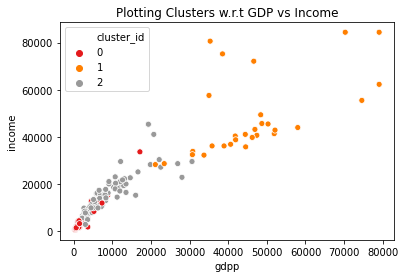

In [59]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = co_kmean, palette='Set1')
plt.title("Plotting Clusters w.r.t GDP vs Income")
plt.show()

<b>Analysis: </b>The plot represents the 3 clusters, although there is little convergence in cluster 0 and cluster 2 countries, it is evident that Cluster 0 countries are underdeveloped as they show low income & GDP of the country

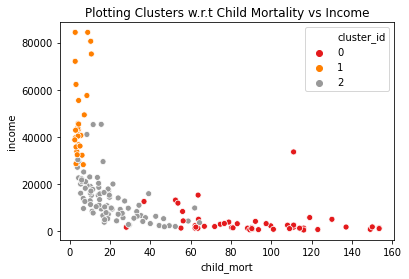

In [60]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = co_kmean, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs Income")
plt.show()

<b>Analysis: </b>The plot clearly represents the 3 clusters, and it is evident that Cluster 0 countries are. underdeveloped as they show growth in Child Mortality with increase in Income of the country.

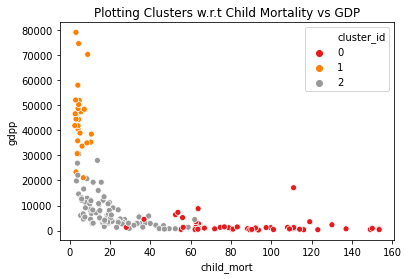

In [61]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = co_kmean, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs GDP")
plt.show()

<b>Analysis: </b>The plot clearly represents the 3 clusters, and it is evident that Cluster 0 countries are underdeveloped as they show growth in Child Mortality with increase in GDP of the country

## Cluster Profiling

In [62]:
# Inspecting the dataframe before cluster profiling
co_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [63]:
# Representing the mean of all the numerical variables for the various clusters
co_kmean.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,90.335417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333
1,4.982759,25405.359310,4239.330028,21316.695862,47784.413793,2.876690,80.453103,1.754138,46068.137931
2,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.110944,73.393333,2.242444,7808.577778


<Figure size 1800x720 with 0 Axes>

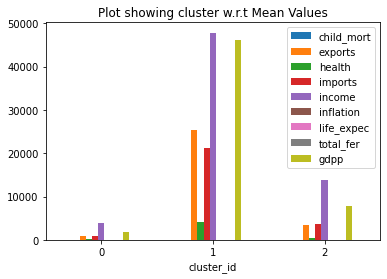

In [64]:
# Visualizing the mean of all the numerical variables for the various clusters
plt.figure(figsize=(25,10))
co_kmean.groupby('cluster_id').mean().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title("Plot showing cluster w.r.t Mean Values")
plt.show()

<b>Analysis: </b>This plot helps us to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.i.e. 
- Cluster 0 represents underdeveloped countries
- Cluster 1 represents developed countries

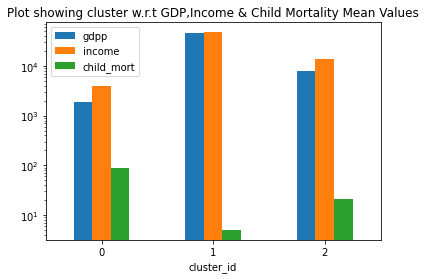

In [65]:
# Plotting clusters to find underpriviledged countries cluster based on income, GDP and Child Mortality
co_kmean[['gdpp','income', 'child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.yscale('log')
plt.title("Plot showing cluster w.r.t GDP,Income & Child Mortality Mean Values")
plt.show()

<b>Analysis: </b> Analysing the above plot we understand that countries belonging to Cluster 0 have the highes mortality rate, lowest income and lowest GDP.This plot helps us to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.i.e. 
- Cluster 0 represents underdeveloped countries
- Cluster 1 represents developed countries

## Finding the observations that belong to underdeveloped countries cluster

In [66]:
# Representing all the under-developed countries as a part of Cluster 1
co_kmean[co_kmean['cluster_id']==0].reset_index()['country']

0                  Afghanistan
1                       Angola
2                        Benin
3                     Botswana
4                 Burkina Faso
5                      Burundi
6                     Cameroon
7     Central African Republic
8                         Chad
9                      Comoros
10            Congo, Dem. Rep.
11                 Congo, Rep.
12               Cote d'Ivoire
13           Equatorial Guinea
14                     Eritrea
15                       Gabon
16                      Gambia
17                       Ghana
18                      Guinea
19               Guinea-Bissau
20                       Haiti
21                        Iraq
22                       Kenya
23                    Kiribati
24                         Lao
25                     Lesotho
26                     Liberia
27                  Madagascar
28                      Malawi
29                        Mali
30                  Mauritania
31                  Mozambique
32      

In [67]:
# Finding the top 10 countries sorted as per low gdp, low income and high mortality rate that need financial aid

co_kmean[co_kmean['cluster_id']==0].sort_values(by=["gdpp", "income", 'child_mort'], ascending=[True, True,False]).reset_index()[0:10]

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0
1,88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0
2,37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
3,112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
4,132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
5,93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,0
6,106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,0
7,31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
8,94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,0
9,50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,0


## Hierarchical Clustering

In [68]:
# Viewing first 5 rows of standard scaled dataframe
co_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


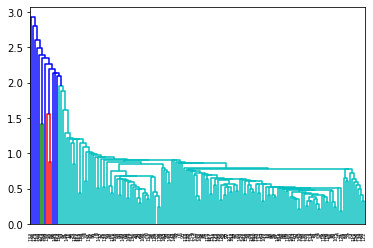

In [69]:
# single linkage

mergings = linkage(co_scaled, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

<b>Analysis: </b>The single linkage looks difficult to interpret and decide on no of clusters, so need to use complete linkage

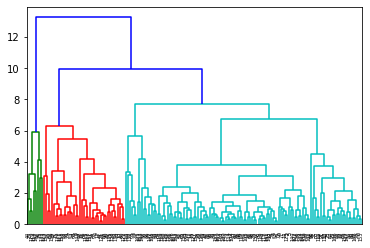

In [70]:
# complete linkage

mergings = linkage(co_scaled, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

<b>Analysis: </b> This gives us a better visulaization for selection of cluster as 3 to cut the treat y scale of 10. Hence choosing 3 clusters and progressing ahead

### Building the final model with cluster=3

In [71]:
# Cutting the tree at 4 cluster
cut_tree(mergings,n_clusters=3).shape

(167, 1)

In [72]:
# reshape to get numpy array
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [73]:
#Creating a copy of original dataframe to handle hierarchihcal clustering labels
co_hier = co.copy()
co_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [74]:
co_hier["cluster_id"] = cluster_labels
co_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [75]:
# Cross-check
co_hier.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [76]:
# Check the count of observation per cluster
co_hier['cluster_id'].value_counts()

0    118
1     41
2      8
Name: cluster_id, dtype: int64

### Visualization of the clusters

We will analyse the clusters by comparing how these three variables - <b>gdpp, child_mort and income</b> vary for each cluster of countries

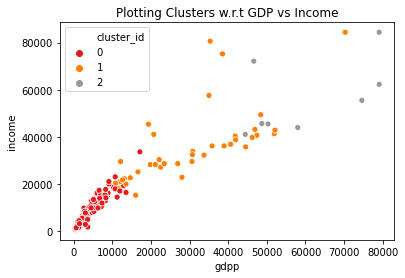

In [77]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = co_hier, palette='Set1')
plt.title("Plotting Clusters w.r.t GDP vs Income")
plt.show()

<b>Analysis: </b>The plot represents the 3 clusters with little overlap in cluster 0 and cluster 1.But Cluster 0 are underdeveloped as they show low Income and GDP of the country

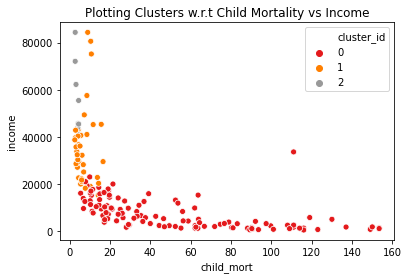

In [78]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = co_hier, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs Income")
plt.show()

<b>Analysis: </b>The plot clearly represents the 3 clusters, and it is evident that Cluster 0 countries are underdeveloped as they show growth in Child Mortality with increase in Income of the country

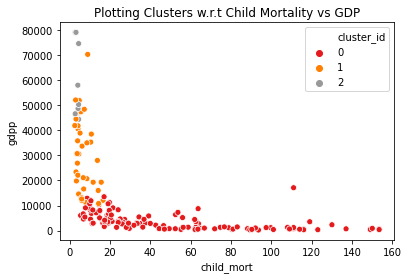

In [79]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = co_hier, palette='Set1')
plt.title("Plotting Clusters w.r.t Child Mortality vs GDP")
plt.show()

<b>Analysis: </b>The plot clearly represents the 3 clusters, and it is evident that Cluster 0 countries are underdeveloped as they show growth in Child Mortality with increase in GDP of the country

## Cluster Profiling

In [80]:
# Inspecting the dataframe before cluster profiling
co_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [81]:
# Representing the mean of all the numerical variables for the various clusters
co_hier.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,50.994068,1466.113115,238.174789,1582.123747,7581.889831,9.187966,67.125424,3.417434,3732.322034
1,6.878049,13587.873171,2424.054156,11854.251220,35853.024390,3.313976,78.384634,1.811707,29492.682927
2,3.825000,45222.215000,6070.207550,38512.335000,56321.750000,1.571125,80.933750,1.727500,60097.000000


<b>Analysis: </b> Analyzing the mean values of the all the columns we identify
- Cluster 0 represents underdeveloped countries
- Cluster 1,2 represents developed countries

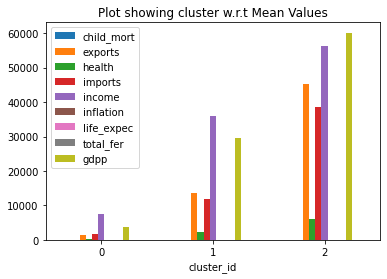

In [82]:
# Visualizing the mean of all the numerical variables for the various clusters
co_hier.groupby('cluster_id').mean().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title("Plot showing cluster w.r.t Mean Values")
plt.show()

<b>Analysis: </b>This plot helps us to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.i.e. 
- Cluster 0 represents underdeveloped countries
- Cluster 1,2 represents developed countries

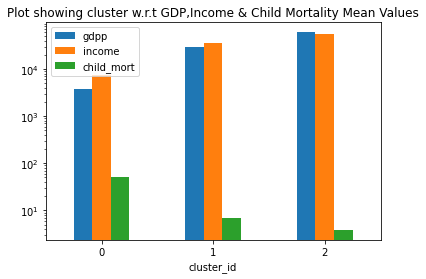

In [83]:
# Visualizing the mean of the variables gdp,income and child mortality rate for the various clusters
co_hier[['gdpp','income', 'child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title("Plot showing cluster w.r.t GDP,Income & Child Mortality Mean Values")
plt.yscale('log')
plt.show()

<b>Analysis: </b> Analysing the above plot we understand that countries belonging to Cluster 0 have the highes mortality rate, lowest income and lowest GDP.This plot helps us to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.i.e. 
- Cluster 0 represents underdeveloped countries as these have high child mortality and low income ,low GDPP
- Cluster 1,2 represents developed countries as these have high income,high GDP and low child mortality 

## Finding the observations that belong to underdeveloped countries cluster

In [84]:
# Representing all the under-developed countries as a part of Cluster 0
co_hier[co_hier['cluster_id']==0].reset_index()['country']

0      Afghanistan
1          Albania
2          Algeria
3           Angola
4        Argentina
          ...     
113        Vanuatu
114      Venezuela
115        Vietnam
116          Yemen
117         Zambia
Name: country, Length: 118, dtype: object

In [85]:
# Finding the top 10 countries sorted as per low gdp, low income and high mortality rate that need financial aid

co_hier[co_hier['cluster_id']==0].sort_values(by=["gdpp", "income", 'child_mort'], ascending=[True, True, False]).reset_index()[0:10]

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0
1,88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0
2,37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
3,112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
4,132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
5,93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,0
6,106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,0
7,31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
8,94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,0
9,50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,0


<b>Analysis: </b>The results of top 10 countries from both K-Means have some similarities to Hierarchical Clustering countries

# Final List of Countries

We choose Kmeans Clustering Analysis, the list of top 10 countries needing financial aid are same and given as in the list:

1. Burundi 
2. Liberia
3. Congo,Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

<b> Choosing KMeans over Hierarchical Clustering</b>
Here with optimal 3 clusters in KMeans we have recieved the same result with hierarchical clustering but Kmeans is preferred over Hierarchical as:
- Kmeans clustering is linear process with a time complexity of O(n) where Hierarchical is a non-linear process with a time complexity of O(n^2)
- Kmeans take clustering requires less RAM size to run where as Hierarchical takes more memory size

Generally, Hierarchical Clustering is computationally expensive. In each iteration, it runs on every cluster that has been formed previously and store them in the memory as well. Therefore, it uses a lot of RAM and if one has limited memory bandwidth, then it becomes a problem to get good clusters.